In [5]:
from WSN import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from wsn_eval import *
from numpy.polynomial import Polynomial

Run either the following cell (2) to read from file or cell (3) to recalculaate noise_factors, successes, and errors.

In [ ]:
noise_factors = np.genfromtxt("local/noise_factors.csv", delimiter=",")
successes = np.genfromtxt("local/successes.csv", delimiter=",")
errors = np.genfromtxt("local/errors.csv", delimiter=",")


100%|██████████| 1000/1000 [1:04:33<00:00,  3.87s/it]


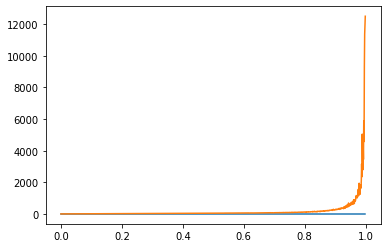

In [24]:
wsn = WSN(100, 11, D=200)

num_trials = 1000

noise_factors = np.arange(start=0, stop=1, step=0.001)
successes = []
errors = []
for nf in tqdm(noise_factors):
    wsn.noise_factor = nf
    avg_success = 0
    avg_error = 0
    for _ in range(num_trials):
        wsn.reset_nodes()
        wsn.reset_anchors()
        est_pos = wsn.localize(method="TDOA")
        success, error = err(est_pos, wsn.nodes, wsn.anchor_nodes)
        avg_success += success
        avg_error += error
    avg_success /= num_trials
    avg_error /= num_trials
    successes.append(avg_success)
    errors.append(avg_error)

plt.figure()
plt.plot(noise_factors, successes)
plt.plot(noise_factors, errors)
plt.show()

58.113439914246925 + 74.11645315309603 x**1


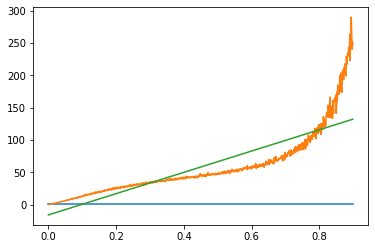

In [29]:
num_noise_factors = len(noise_factors)
to_show = int(num_noise_factors * 0.9)

fit = Polynomial.fit(noise_factors[:to_show], errors[:to_show], deg=1)

print(fit)

plt.figure()
plt.plot(noise_factors[:to_show], successes[:to_show])
plt.plot(noise_factors[:to_show], errors[:to_show])
plt.plot(noise_factors[:to_show], fit(noise_factors[:to_show]))
plt.show()

In [23]:
fit.convert()
std = np.std(errors - fit(noise_factors))

In [30]:
noise_factors.tofile("local/noise_factors.csv", sep=",")
successes = np.array(successes)
successes.tofile("local/successes.csv", sep=",")
errors = np.array(errors)
errors.tofile("local/errors.csv", sep=",")
